=== LOADING PREDICTION RESULTS ===
Total test samples: 317

=== 1. BASIC FAIRNESS ANALYSIS ===

False Positive Rate (FPR): 0.3038
False Negative Rate (FNR): 0.2830

True Positives:  114
True Negatives:  110
False Positives: 48
False Negatives: 45

Accuracy on Non-Cyberbullying: 0.6962
Accuracy on Cyberbullying:     0.7170
Accuracy Gap:                  0.0208

=== 2. DEMOGRAPHIC PARITY ANALYSIS ===
Overall Positive Prediction Rate: 0.5110
Positive Prediction Rate (True Non-Cyber): 0.3038
Positive Prediction Rate (True Cyber):     0.7170
Demographic Parity Gap: 0.4132

=== 3. EQUAL OPPORTUNITY ANALYSIS ===
True Positive Rate (Non-Cyber correctly identified): 0.6962
True Positive Rate (Cyber correctly identified):     0.7170
Equal Opportunity Gap: 0.0208

=== 4. PREDICTION CONFIDENCE ANALYSIS ===

Confidence Statistics (Probability of Cyberbullying):

For True Non-Cyberbullying:
  Mean: 0.3294
  Std:  0.3149

For True Cyberbullying:
  Mean: 0.6861
  Std:  0.3068

=== CREATING FAIRNESS VI

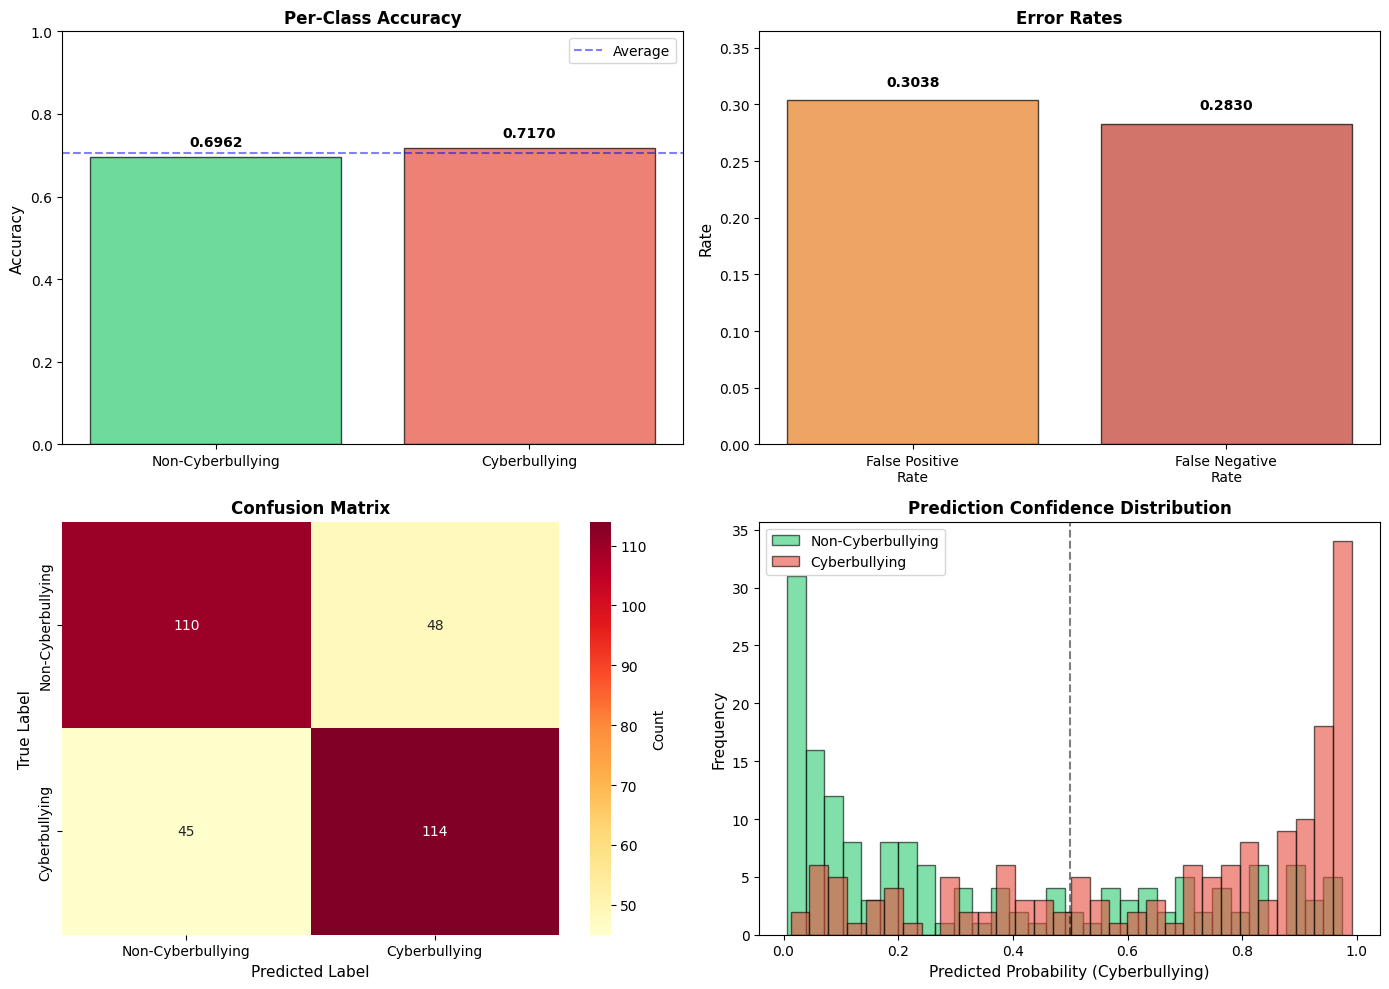


=== FAIRNESS METRICS SUMMARY ===
✓ Fairness metrics saved to results/metrics/fairness_metrics.csv

Fairness Metrics Table:
                              Metric  Value
        Accuracy (Non-Cyberbullying) 0.6962
            Accuracy (Cyberbullying) 0.7170
                        Accuracy Gap 0.0208
                 False Positive Rate 0.3038
                 False Negative Rate 0.2830
  Positive Prediction Rate (Overall) 0.5110
Positive Prediction Rate (Non-Cyber) 0.3038
    Positive Prediction Rate (Cyber) 0.7170
              Demographic Parity Gap 0.4132
      True Positive Rate (Non-Cyber) 0.6962
          True Positive Rate (Cyber) 0.7170
               Equal Opportunity Gap 0.0208
          Avg Confidence (Non-Cyber) 0.3294
              Avg Confidence (Cyber) 0.6861

=== BIAS ANALYSIS BY COMMENT LENGTH ===

Accuracy by Comment Length Quartile:
length_quartile
Q1    0.647059
Q2    0.682692
Q3    0.701754
Q4    0.816901
Name: correct, dtype: float64


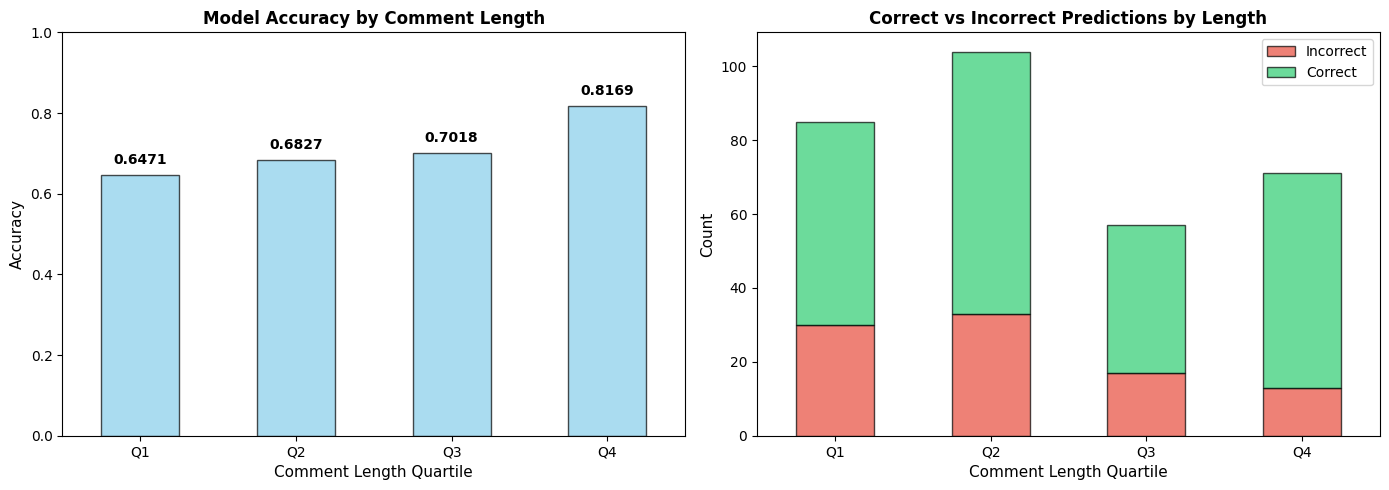


=== ERROR ANALYSIS ===

False Positives: 48

Sample False Positives:
                                              comment  predicted_prob_1
8                              dh masuk grup blm zah?          0.841047
23  "kasian banget Jane udah nunggu keluar penjara...          0.645463
24                           "G bole melet dosaa rik"          0.966684
28                 itu dosen apa predator mengerikan           0.682026
33                 ngbayangin teh astrid pas mudaðŸ˜          0.908567

False Negatives: 45

Sample False Negatives:
                                              comment  predicted_prob_1
18                               kampus macam apa ini          0.163393
29  Semoga mbk Lisa sehat selalu ya sampai idul Ad...          0.012544
34  selamat natal dan orde baru ya â˜ºï¸â˜ºï¸â˜º...          0.058204
49  Saya bersaksi bahwa bapak soeharto sangat tera...          0.093773
72  Ortunya sibuk ngurusin masalah orang lain samp...          0.378991

FINAL FAIRNESS ANAL

In [1]:
"""
Notebook 5: Fairness Analysis
Analisis bias dan fairness untuk publikasi jurnal Sinta 3
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# ===== LOAD PREDICTIONS =====
print("=== LOADING PREDICTION RESULTS ===")
results_df = pd.read_csv('../results/metrics/test_predictions.csv')
print(f"Total test samples: {len(results_df)}")

# ===== 1. BASIC FAIRNESS METRICS =====
print("\n=== 1. BASIC FAIRNESS ANALYSIS ===")

# Calculate error rates per class
y_true = results_df['label'].values
y_pred = results_df['predicted_label'].values

# False Positive Rate (FPR)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

print(f"\nFalse Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"\nTrue Positives:  {tp}")
print(f"True Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Calculate per-class accuracy
non_cyber_mask = results_df['label'] == 0
cyber_mask = results_df['label'] == 1

acc_non_cyber = accuracy_score(
    results_df[non_cyber_mask]['label'],
    results_df[non_cyber_mask]['predicted_label']
)
acc_cyber = accuracy_score(
    results_df[cyber_mask]['label'],
    results_df[cyber_mask]['predicted_label']
)

print(f"\nAccuracy on Non-Cyberbullying: {acc_non_cyber:.4f}")
print(f"Accuracy on Cyberbullying:     {acc_cyber:.4f}")
print(f"Accuracy Gap:                  {abs(acc_non_cyber - acc_cyber):.4f}")

# ===== 2. DEMOGRAPHIC PARITY =====
print("\n=== 2. DEMOGRAPHIC PARITY ANALYSIS ===")

# Calculate positive prediction rate for each class
positive_pred_rate_overall = (y_pred == 1).sum() / len(y_pred)
positive_pred_rate_non_cyber = (results_df[non_cyber_mask]['predicted_label'] == 1).sum() / non_cyber_mask.sum()
positive_pred_rate_cyber = (results_df[cyber_mask]['predicted_label'] == 1).sum() / cyber_mask.sum()

print(f"Overall Positive Prediction Rate: {positive_pred_rate_overall:.4f}")
print(f"Positive Prediction Rate (True Non-Cyber): {positive_pred_rate_non_cyber:.4f}")
print(f"Positive Prediction Rate (True Cyber):     {positive_pred_rate_cyber:.4f}")
print(f"Demographic Parity Gap: {abs(positive_pred_rate_non_cyber - positive_pred_rate_cyber):.4f}")

# ===== 3. EQUAL OPPORTUNITY =====
print("\n=== 3. EQUAL OPPORTUNITY ANALYSIS ===")

# True Positive Rate per class
tpr_non_cyber = tn / (tn + fp) if (tn + fp) > 0 else 0  # For class 0
tpr_cyber = tp / (tp + fn) if (tp + fn) > 0 else 0      # For class 1

print(f"True Positive Rate (Non-Cyber correctly identified): {tpr_non_cyber:.4f}")
print(f"True Positive Rate (Cyber correctly identified):     {tpr_cyber:.4f}")
print(f"Equal Opportunity Gap: {abs(tpr_non_cyber - tpr_cyber):.4f}")

# ===== 4. PREDICTION CONFIDENCE ANALYSIS =====
print("\n=== 4. PREDICTION CONFIDENCE ANALYSIS ===")

# Analyze prediction confidence by class
conf_non_cyber = results_df[non_cyber_mask]['predicted_prob_1'].values
conf_cyber = results_df[cyber_mask]['predicted_prob_1'].values

print(f"\nConfidence Statistics (Probability of Cyberbullying):")
print(f"\nFor True Non-Cyberbullying:")
print(f"  Mean: {conf_non_cyber.mean():.4f}")
print(f"  Std:  {conf_non_cyber.std():.4f}")
print(f"\nFor True Cyberbullying:")
print(f"  Mean: {conf_cyber.mean():.4f}")
print(f"  Std:  {conf_cyber.std():.4f}")

# ===== VISUALIZATIONS =====
print("\n=== CREATING FAIRNESS VISUALIZATIONS ===")

# Figure 1: Error Rates Comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Accuracy per class
classes = ['Non-Cyberbullying', 'Cyberbullying']
accuracies = [acc_non_cyber, acc_cyber]
colors_acc = ['#2ecc71', '#e74c3c']

bars1 = axes[0, 0].bar(classes, accuracies, color=colors_acc, alpha=0.7, edgecolor='black')
axes[0, 0].set_ylim(0, 1.0)
axes[0, 0].set_ylabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Per-Class Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].axhline(y=(acc_non_cyber + acc_cyber) / 2, color='blue', 
                   linestyle='--', alpha=0.5, label='Average')
axes[0, 0].legend()

for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# 2. Error rates (FPR and FNR)
error_types = ['False Positive\nRate', 'False Negative\nRate']
error_values = [fpr, fnr]
colors_err = ['#e67e22', '#c0392b']

bars2 = axes[0, 1].bar(error_types, error_values, color=colors_err, alpha=0.7, edgecolor='black')
axes[0, 1].set_ylim(0, max(error_values) * 1.2)
axes[0, 1].set_ylabel('Rate', fontsize=11)
axes[0, 1].set_title('Error Rates', fontsize=12, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. Confusion Matrix Heatmap
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=classes, yticklabels=classes,
            ax=axes[1, 0], cbar_kws={'label': 'Count'})
axes[1, 0].set_xlabel('Predicted Label', fontsize=11)
axes[1, 0].set_ylabel('True Label', fontsize=11)
axes[1, 0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# 4. Prediction confidence distribution
axes[1, 1].hist(conf_non_cyber, bins=30, alpha=0.6, label='Non-Cyberbullying',
                color='#2ecc71', edgecolor='black')
axes[1, 1].hist(conf_cyber, bins=30, alpha=0.6, label='Cyberbullying',
                color='#e74c3c', edgecolor='black')
axes[1, 1].set_xlabel('Predicted Probability (Cyberbullying)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Prediction Confidence Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Decision Threshold')

plt.tight_layout()
plt.savefig('../results/figures/fairness_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== FAIRNESS METRICS SUMMARY =====
print("\n=== FAIRNESS METRICS SUMMARY ===")

fairness_metrics = {
    'Metric': [
        'Accuracy (Non-Cyberbullying)',
        'Accuracy (Cyberbullying)',
        'Accuracy Gap',
        'False Positive Rate',
        'False Negative Rate',
        'Positive Prediction Rate (Overall)',
        'Positive Prediction Rate (Non-Cyber)',
        'Positive Prediction Rate (Cyber)',
        'Demographic Parity Gap',
        'True Positive Rate (Non-Cyber)',
        'True Positive Rate (Cyber)',
        'Equal Opportunity Gap',
        'Avg Confidence (Non-Cyber)',
        'Avg Confidence (Cyber)'
    ],
    'Value': [
        f"{acc_non_cyber:.4f}",
        f"{acc_cyber:.4f}",
        f"{abs(acc_non_cyber - acc_cyber):.4f}",
        f"{fpr:.4f}",
        f"{fnr:.4f}",
        f"{positive_pred_rate_overall:.4f}",
        f"{positive_pred_rate_non_cyber:.4f}",
        f"{positive_pred_rate_cyber:.4f}",
        f"{abs(positive_pred_rate_non_cyber - positive_pred_rate_cyber):.4f}",
        f"{tpr_non_cyber:.4f}",
        f"{tpr_cyber:.4f}",
        f"{abs(tpr_non_cyber - tpr_cyber):.4f}",
        f"{conf_non_cyber.mean():.4f}",
        f"{conf_cyber.mean():.4f}"
    ]
}

fairness_df = pd.DataFrame(fairness_metrics)
fairness_df.to_csv('../results/metrics/fairness_metrics.csv', index=False)
print("✓ Fairness metrics saved to results/metrics/fairness_metrics.csv")

# Display table
print("\nFairness Metrics Table:")
print(fairness_df.to_string(index=False))

# ===== BIAS ANALYSIS BY COMMENT LENGTH =====
print("\n=== BIAS ANALYSIS BY COMMENT LENGTH ===")

# Calculate word count if not exists
if 'word_count' not in results_df.columns:
    results_df['word_count'] = results_df['cleaned_comment'].str.split().str.len()

# Divide into length quartiles
results_df['length_quartile'] = pd.qcut(results_df['word_count'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Accuracy by length quartile
accuracy_by_length = results_df.groupby('length_quartile')['correct'].mean()

print("\nAccuracy by Comment Length Quartile:")
print(accuracy_by_length)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy by length
accuracy_by_length.plot(kind='bar', ax=axes[0], color='skyblue', 
                        alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Comment Length Quartile', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].set_title('Model Accuracy by Comment Length', fontsize=12, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].set_ylim(0, 1.0)

for i, v in enumerate(accuracy_by_length.values):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Distribution of correct/incorrect by length
length_correct = results_df.groupby(['length_quartile', 'correct']).size().unstack(fill_value=0)
length_correct.plot(kind='bar', stacked=True, ax=axes[1], 
                   color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Comment Length Quartile', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_title('Correct vs Incorrect Predictions by Length', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(['Incorrect', 'Correct'])

plt.tight_layout()
plt.savefig('../results/figures/bias_by_length.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== ERROR ANALYSIS =====
print("\n=== ERROR ANALYSIS ===")

# False Positives (predicted as cyberbullying but actually not)
false_positives = results_df[(results_df['label'] == 0) & (results_df['predicted_label'] == 1)]
print(f"\nFalse Positives: {len(false_positives)}")
if len(false_positives) > 0:
    print("\nSample False Positives:")
    print(false_positives[['comment', 'predicted_prob_1']].head())

# False Negatives (predicted as non-cyberbullying but actually is)
false_negatives = results_df[(results_df['label'] == 1) & (results_df['predicted_label'] == 0)]
print(f"\nFalse Negatives: {len(false_negatives)}")
if len(false_negatives) > 0:
    print("\nSample False Negatives:")
    print(false_negatives[['comment', 'predicted_prob_1']].head())

# ===== FINAL SUMMARY REPORT =====
print("\n" + "="*60)
print("FINAL FAIRNESS ANALYSIS SUMMARY")
print("="*60)
print(f"\n1. MODEL PERFORMANCE:")
print(f"   - Overall Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"   - Non-Cyberbullying Accuracy: {acc_non_cyber:.4f}")
print(f"   - Cyberbullying Accuracy: {acc_cyber:.4f}")
print(f"   - Accuracy Gap: {abs(acc_non_cyber - acc_cyber):.4f}")

print(f"\n2. ERROR RATES:")
print(f"   - False Positive Rate: {fpr:.4f}")
print(f"   - False Negative Rate: {fnr:.4f}")

print(f"\n3. FAIRNESS METRICS:")
print(f"   - Demographic Parity Gap: {abs(positive_pred_rate_non_cyber - positive_pred_rate_cyber):.4f}")
print(f"   - Equal Opportunity Gap: {abs(tpr_non_cyber - tpr_cyber):.4f}")

print(f"\n4. RECOMMENDATION:")
if abs(acc_non_cyber - acc_cyber) < 0.05:
    print("   ✓ Model menunjukkan fairness yang baik dengan gap akurasi < 5%")
else:
    print("   ⚠ Perlu perhatian: Gap akurasi antar kelas cukup signifikan")

if abs(positive_pred_rate_non_cyber - positive_pred_rate_cyber) < 0.1:
    print("   ✓ Demographic parity terpenuhi dengan baik")
else:
    print("   ⚠ Model menunjukkan bias dalam prediksi positif antar kelas")

print("\n" + "="*60)
print("Analisis selesai! Semua hasil tersimpan di folder results/")
print("="*60)